# Tarea 5

**Alumna:** Sofía Castro Varona

**Fecha de entrega:** Miércoles 4 de mayo del 2022


**Instrucciones:** El código de la solución a los enunciados de esta tarea debe de escribirse usando jupyter notebook. Debes entregar la tarea en formato HTML y en ipynb en la platafoma de classroom. Además, debes comentar que acción, operación y/o proceso están realizando las líneas del código solución.

1.- Considerando la ecuación de onda en dos dimensiones

$
\dfrac{\partial^2 u}{\partial t^2} =c^2\left(\dfrac{\partial^2 u}{\partial x^2} +\dfrac{\partial^2 u}{\partial y^2}\right)
$

cuya condición inicial es $u_{i,j}^{n=0}= exp(-0.5(x-Lx/2.0)^2 - 0.5(y-Ly/2.0)^2)$, donde el dominio $D$ de la PDE es el cuadrado de longitud $L=10$ y $u(\partial D)=0$ para todo $t$.

Encuentra $u$ para $n=0,1,2\dots,10$ y grafica con el método *subplots* cada una de las soluciones. Hint: Usa los mismo parametros que vimos en clase.
    
2.-Investiga la definicion de los polinomios de Chebyshev y explica brevemente como se construyen.
* Considerando el ejemplo visto en clase, interpola los puntos $(1,1), (2,.3), (3,5)$ y $(4,4)$ utilizando como función base los polinomios de Chebyshev. Hint: revisa el módulo numpy.polynomial.chebyshev.chebvander


3.- Grafica los puntos a interpolar, la funcion interpoladora encontrada utilizando como funciones base potencias $x$ (relizado en clase) y la que encontraste utilizando polinomios de Chebyshev. ¿Que puede decir de lo que se observa en la gráfica?

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from pylab import *

**Ejercicio 1**

La solución de la ecuación es:

$
Cx2 = \dfrac{dt^2}{dx^2}c^2
$

In [73]:
#Los parámetros usados fueron los siguientes
N, Nx, Ny = 50, 50, 50
dt = 0.1
Lx = 10
Ly = 10

x = np.linspace(0,Lx,N+1)
y = np.linspace(0,Ly,N+1)

dx = x[1]-x[0]
dy = y[1]-y[0]


Nt = 5
t = np.linspace(0,0.5,Nt+1)
c = 1

dx2=dx**2
Cx2 = c**2*dt**2/dx**2

In [74]:
#Creamos los arrays para la variable u
u = np.zeros((Nx+1,Ny+1)) #solución
u_n = np.zeros((Nx+1,Ny+1)) #solución en tiempo n
u_nm1 = np.zeros((Nx+1,Ny+1)) #solución en tiempo n-1
u_1 = np.zeros((Nx+1,Ny+1)) 

In [75]:
#Ponemos nuestra condición inicial 
def CI(x,y,Lx,Ly):
    return np.exp(-0.5*(x-Lx/2)**2-0.5*(y-Ly/2)**2)

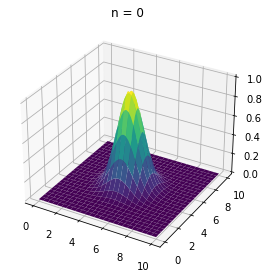

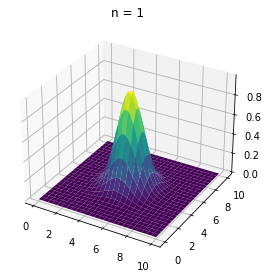

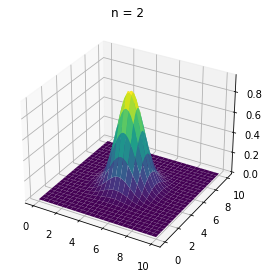

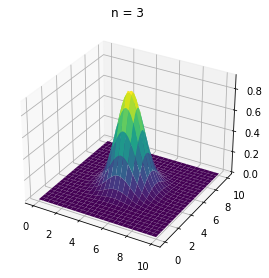

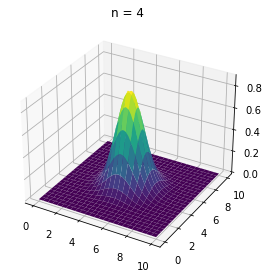

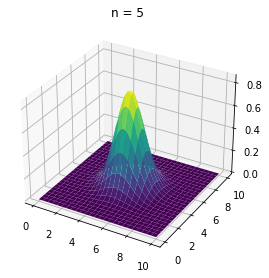

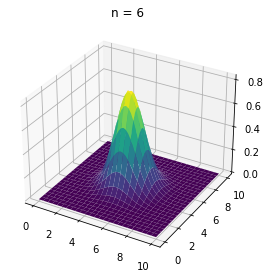

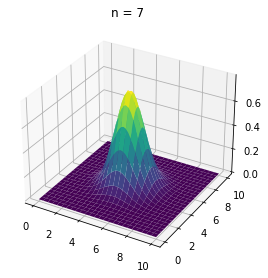

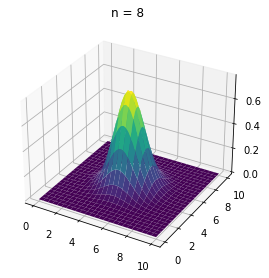

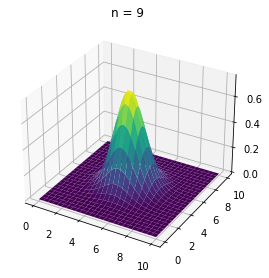

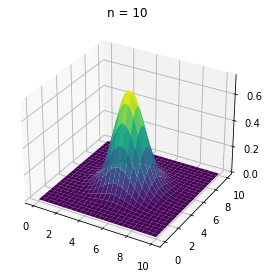

In [76]:
X,Y = np.meshgrid(x,y) #dominio de nuestra gráfica en 3D
u_n0 = CI(X,Y,Lx,Ly) #nuestra función en tiempo cero

for n in range (0, 11): #ponemos 11 para que tome en cuenta al 10 
    if n == 0:
        fig = plt.figure(figsize = (15,15))
        ax = fig.add_subplot(333, projection ="3d")
        ax.plot_surface(X,Y,u_n0, cmap = 'viridis')
        ax.set_title('n = 0')
        
        aux = u_n0 #este aux nos va a ir cambiando el orden del tiempo para los demás n 
        n+= 1 #seguimos para los siguientes tiempos arriba de 0 
    else:
        u_n, u_nm1 = aux, aux #u_n y u_nm1 van a ir cambiando de tiempo así que uso el contador
                              #aux que nos regresa la función de las condiciones iniciales 
        
        for i in range(0,Nx):
            for j in range(0,Ny):
                u_xx = u_n[i+1,j]-2*u_n[i,j]+u_n[i-1,j]
                u_yy = u_n[i,j+1]-2*u_n[i,j]+u_n[i,j-1]
                u_1[i,j]=Cx2*u_xx+Cx2*u_yy+2*u_n[i,j]-u_nm1[i,j]
        u[:,0] = 0
        u[:, Ny] = 0
        u[0,:] = 0
        u[Nx,:] = 0
        
        fig = plt.figure(figsize = (15,15))
        ax = fig.add_subplot(333, projection ="3d")
        ax.plot_surface(X,Y,u_1, cmap = 'viridis')
        ax.set_title('n = ' + str(n))
        
        aux = u_1 #nuestro aux irá aumentando con cada n 
        n+=1 #seguimos para los siguientes tiempos

#Conforme el tiempo avanza la gráfica baja 

**Ejercicio 2**

***Polinomios de Chebyshev***

Es una sucesión de polinomios ortogonales para cada $n \geq 0$ la cual existe un único polinomio $T_{n}$, tal que para cada $\theta$ real

$ 
T_{n}(cos(\theta)) = cos n \theta
$

$T_{n}$ tiene grado n. Si $n \geq 1 $ el coeficiente de $x^{n}$ es $2^{n-1}$. Además, para $n \geq 2$ la identidad es

$
T_{n}(x) = 2xT_{n-1}(x) - T_{n-2}(x) 
$

Para $- 1 \leq x \leq 1 $ se tiene

$
T_{n}(x) = cos(n cos^{-1} x) 
$

Interpola los puntos $(1,1), (2,3), (3,5)$ y $(4,4)$

In [2]:
#Primero crearemos nuestras coordenadas 
x = np.array([1, 2, 3, 4])
y = np.array([1, 3, 5, 4])

In [3]:
#Después tenemos que determinar el grado de nuestro polinomio que para todo n es x - 1
deg = len(x) - 1

In [4]:
#Construimos nuestra matriz A 
A = np.polynomial.chebyshev.chebvander(x, deg)
A

array([[  1.,   1.,   1.,   1.],
       [  1.,   2.,   7.,  26.],
       [  1.,   3.,  17.,  99.],
       [  1.,   4.,  31., 244.]])

In [5]:
#Los coeficientes de nuestra función son los siguientes 
c = np.linalg.solve(A,y)
c

array([ 3.5  , -3.875,  1.5  , -0.125])

In [6]:
#Nuestra función es la siguiente 
f_cheby = np.polynomial.Chebyshev(c, domain = [-1, 5], window = [-1, 5])
f_cheby

Chebyshev([ 3.5  , -3.875,  1.5  , -0.125], domain=[-1.,  5.], window=[-1.,  5.])

**Ejercicio 3**

In [7]:
#Hagamos la misma función pero para potencias x 
A_poly = np.polynomial.polynomial.polyvander(x,deg)
c_poly = np.linalg.solve(A_poly,y)
f_poly = np.polynomial.Polynomial(c_poly, domain = [-1,5], window = [-1,5])
f_poly

Polynomial([ 2. , -3.5,  3. , -0.5], domain=[-1.,  5.], window=[-1.,  5.])

In [8]:
x_poly, y_poly = f_poly.linspace()
x_cheby, y_cheby = f_cheby.linspace()

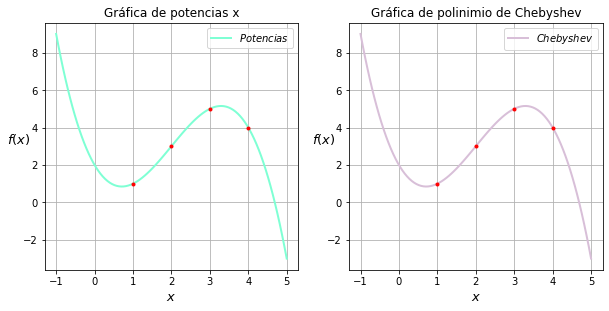

In [14]:
figure(figsize=(10,10))

subplot(221)
plot(x_poly, y_poly, 'aquamarine',linewidth=2, markersize=6, label=r'$Potencias$')
plot(x,y,"r.")

ylabel(r'$f(x)$', fontsize = 13, rotation = 0)
xlabel(r'$x$', fontsize = 13, rotation = 0)
title(r'Gráfica de potencias x')
grid()
legend()

subplot(222)
plot(x_cheby, y_cheby, 'thistle' ,linewidth=2, markersize=6, label=r'$Chebyshev$')
plot(x,y,"r.")

ylabel(r'$f(x)$', fontsize = 13, rotation = 0)
xlabel(r'$x$', fontsize = 13, rotation = 0)
title(r'Gráfica de polinimio de Chebyshev')
grid()
legend()

Podemos observar que ambas gráficas coinciden perfectamente en los resultados, si bien ambas funciones bases son diferentes, ya que los resultados de los coeficientes de la matriz son distintos, al interpolarlas dan lo mismo. Podemos concluir que siempre hay un único polinomio interpolador para ***n*** puntos

Otra manera de corroborarlo es juntando las gráficas en una sola 

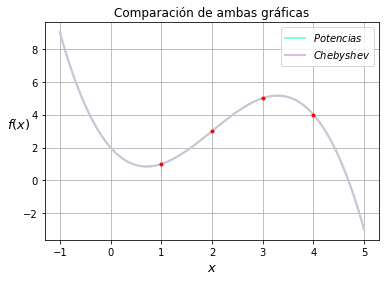

In [18]:
plot(x_poly, y_poly, 'aquamarine',linewidth=2, markersize=6, label=r'$Potencias$')
plot(x_cheby, y_cheby, 'thistle' ,linewidth=2, markersize=6, label=r'$Chebyshev$')
plot(x,y,"r.")

ylabel(r'$f(x)$', fontsize = 13, rotation = 0)
xlabel(r'$x$', fontsize = 13, rotation = 0)
title(r'Comparación de ambas gráficas')
grid()
legend()

Como podemos observar, no se ve la gráfica de potencias, ya que intersecta perfectamente con la de Chebyshev. Por lo que podemos concluir que es el mismo polinomio interpolador